In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

In [2]:
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth = 100)

Let's create a function for the slope of a line.

In [22]:
def lin(a,b,x):
    # a = slope, b = y-int
    return a * x + b

In [52]:
a = 3.  # slope
b = 8.  # y-int

In [53]:
n=30
x = random(n) # create 30 random points
y = lin(a,b,x)

In [54]:
x

array([ 0.6205,  0.6712,  0.5619,  0.1791,  0.132 ,  0.1511,  0.882 ,  0.8212,  0.1963,  0.2334,
        0.1475,  0.6099,  0.7508,  0.3892,  0.627 ,  0.4904,  0.968 ,  0.3337,  0.1804,  0.463 ,
        0.0942,  0.976 ,  0.6484,  0.9443,  0.9371,  0.5765,  0.3195,  0.4003,  0.7735,  0.4476])

In [55]:
y

array([  9.8615,  10.0137,   9.6858,   8.5373,   8.396 ,   8.4532,  10.6461,  10.4636,   8.5888,
         8.7001,   8.4424,   9.8298,  10.2523,   9.1677,   9.8811,   9.4712,  10.9039,   9.001 ,
         8.5413,   9.3889,   8.2825,  10.9281,   9.9451,  10.8329,  10.8114,   9.7294,   8.9586,
         9.2009,  10.3205,   9.3428])

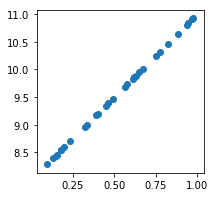

In [56]:
plt.scatter(x,y)

In [57]:
# sum of squared errors
def sse(y,y_pred):
    return ((y-y_pred)**2).sum()

In [58]:
# loss function
def loss(y,a,b,x):
    return sse(y, lin(a,b,x))

In [59]:
def avg_loss(y,a,b,x):
    return np.sqrt(loss(y,a,b,x)/n)

Now let's forget that we know the slope is 3 and y-intercept is 8.

In [60]:
# random guesses
a_guess = -1. # slope
b_guess = 1. # y-int
avg_loss(y,a_guess,b_guess, x)

9.1380

Average loss with random guesses is 9.196 which is not very good.

In order to create an optimizer, we need something that can make our weights a little bit better.

In [61]:
lr = 0.01 # learning rate
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)     = 2(y_pred - y)
# d[(y-(a*x+b))**2,a] = 2x (b + a x - y)    = x * dy/db

If you know the derivative of your loss function with respect to your weights, then all you need to do is update your weights by the opposite of that.

The derivative is the thing that says as your weight changes, your output changes by this amount.

Now we will create a function called *update* which is going to take our *a_guess* and our *b_guess* and make them a little bit better. To make them better, we calculate the derivative of our loss function with respect to **b** and the derivative of our loss function with respect to **a**.

In [62]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    
    # derivative of y with respect to b
    dydb = 2 * (y_pred - y)
    
    # derivative of y with respect to a
    dyda = x * dydb
    
    # subtract a little bit from our a_guess
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [63]:
fig = plt.figure(dpi = 100, figsize = (5,4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

In [64]:
def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10):
        upd()
    return line,

In [65]:
ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval =100)
ani

This is how Stochastic Gradient Descent works which is the most important algorithm in Deep Learning. It starts with random weights and ends with weights that better fit your model.